# 📘 Introduction

### 👤 Author Information

**Name**: Shuvam Chowdhury

**Project Type**: EDA Analysis

**GitHub**: https://github.com/cshuvam/Students-Social-Media-Impact-EDA



## I. About the Project

Social media has become an integral part of student life — from entertainment and communication to academics and emotional well-being. While its benefits are undeniable, overuse and addiction are raising concerns about its impact on mental health, sleep, grades, and relationships among students.

This project explores the **"Students Social Media Addiction" dataset** containing anonymized responses from **705 students aged 16–25** across **multiple countries**.

## II. Objective

To **understand how social media usage correlates** with student life factors such as:

- Mental health
- Sleep quality
- Academic performance
- Relationship conflicts
- Addiction levels

We follow a structured process: inspect, clean, visualize, and interpret the data.

## III. Scope of Analysis

We'll specifically explore:
1. Is social media linked to **poor mental health** or **less sleep**?
2. Does high usage hurt **academic performance**?
3. Are some platforms more tied to **addiction or conflicts**?
4. How do **gender, age, and country** shape what platforms students use?
5. Do students **in relationships** report more social media conflicts than others?

# 📂 Data Overview & Preparation

## Dataset Description

The dataset titled **"Students Social Media Addiction"** contains **705 anonymized student responses** aged **16–25** across **over 90 countries**, measuring both:
- **Quantitative** factors (e.g. usage hours, sleep quality)
- **Qualitative** experiences (e.g. platform choice, mental health score, conflict types)

## Column Definitions

| Column                        | Data Type   | Description                                       |
|-------------------------------|-------------|---------------------------------------------------|
| `Student_ID`                  | Integer     | Unique identifier for each student                |                        
| `Age`                         | Integer     | Age in years                                      |
| `Gender`                      | Categorical | "Male" or "Female"                                |
| `Academic_Level`              | Categorical | High School / Undergraduate / Graduate              |
| `Country`                     | Categorical | Country of residence                              |
| `Avg_Daily_Usage_Hours`       | Float       | Avg daily hours spent on social media             |
| `Most_Used_Platform`          | Categorical | Instagram, TikTok, etc.                             |
| `Affects_Academic_Performance`| Boolean     | Yes/No on impact to academic performance          |
| `Sleep_Hours_Per_Night`       | Float       | Avg hours of sleep per night                      |
| `Mental_Health_Score`         | Integer     | 1 (poor) to 10 (excellent)                        |
| `Relationship_Status`         | Categorical | Single / In Relationship / Complicated             |
| `Conflicts_Over_Social_Media` | Integer     | Number of conflicts (0–5) due to social media     |
| `Addicted_Score`              | Integer     | Self-rated social media addiction score (1–10)      |

## Data Source

- **Collected**: Q1 2025 (early 2025)
- **Coverage**: Students from India, USA, UK, Canada, Australia, and **over 90+ countries**
- **Participants**: Aged 16–25 (High School to Graduate school)
- **Privacy**: No personally identifiable data included
- **Cleaning**: Checked for duplicates, hour ranges (0–24), and validated survey responses
- **Dataset Link**: [Students Social Media Addiction on Kaggle](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships)

## Data Loading

In [28]:
import pandas as pd

df = pd.read_csv("students_social_media_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'students_social_media_data.csv'

# 🔍 Initial Data Inspection & Cleaning

## Preliminary Understanding

First, we check the overall dataset structure:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [4]:
# First 10 rows – quick sample check
df.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [5]:
# Last 10 rows – further validation
df.tail(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
695,696,23,Male,Graduate,USA,5.5,Twitter,Yes,6.7,6,In Relationship,3,7
696,697,21,Female,Undergraduate,Mexico,6.3,TikTok,Yes,6.2,5,Single,4,8
697,698,24,Male,Graduate,France,4.8,Facebook,No,7.1,7,In Relationship,2,5
698,699,19,Female,Undergraduate,Canada,5.7,Instagram,Yes,6.6,6,Single,3,7
699,700,22,Male,Graduate,UK,6.2,Twitter,Yes,6.3,5,Single,4,8
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [6]:
# Check dataset dimensions
df.shape

(705, 13)

In [7]:
# Review all column names
df.columns.tolist()

['Student_ID',
 'Age',
 'Gender',
 'Academic_Level',
 'Country',
 'Avg_Daily_Usage_Hours',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Sleep_Hours_Per_Night',
 'Mental_Health_Score',
 'Relationship_Status',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

## Missing Values Check

*Ensure dataset integrity by validating completeness*

In [8]:
print("Missing Values Per Column:", df.isnull().sum(), sep="\n")
print("\nAny missing values overall?", df.isnull().values.any())

Missing Values Per Column:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Any missing values overall? False


## Categorical Value Standardization

Validate category consistency (e.g., capitalization, typo issues):

In [9]:
categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                       'Affects_Academic_Performance', 'Relationship_Status']

for col in categorical_columns:
    print(f"{col:30} → {df[col].unique()}")

Gender                         → ['Female' 'Male']
Academic_Level                 → ['Undergraduate' 'Graduate' 'High School']
Country                        → ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Ge

## Initial Insights Summary

### 1. Structure & Completeness
- **Shape**: 705 rows × 13 columns (full dataset)
- **Missing values**: 0 in all columns — requires no filling or imputation

### 2. Data Types

- **Numeric features (7)**: Student_ID, Age, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score, Conflicts_Over_Social_Media, Addicted_Score
- **Categorical features (6)**: Gender, Academic_Level, Country, Most_Used_Platform, Affects_Academic_Performance, Relationship_Status

### 3. Statistical Overview

| Feature                      | Mean     | Min   | Max   | Key Insight                                  |
|------------------------------|----------|-------|-------|----------------------------------------------|
| **Age**                      | 20.66    | 18    | 24    | University-aged student group                |
| **Daily Usage (Hours)**      | 4.92     | 1.5   | 8.5   | **High usage** observed globally             |
| **Sleep Hours (Night)**      | 6.87     | 3.8   | 9.6   | **Slightly below ideal** (7–9 hours)         |
| **Mental Health Score**      | 6.23     | 4     | 9     | **Moderate to poor health** range (lower = worse) |
| **Conflicts (0–5 scale)**    | 2.85     | 0     | 5     | **Regular social media conflicts** reported   |
| **Addiction Score (1–10)**   | 6.44     | 2     | 9     | **High average** - potential risk group

### 4. Categorical Consistency

- **Gender**: Only `'Male'` / `'Female'` values
- **Academic Level**: `'High School'`, `'Undergraduate'`, `'Graduate'` present
- **Country**: Over 90 values, well-distributed
- **Platform**: `'Instagram'`, `'TikTok'`, `'YouTube'` dominate usage
- **Academic Impact**: `'Yes'` or `'No'`
- **Relationship Status**: `'Single'`, `'In Relationship'`, `'Complicated'`

# 📊 Exploratory Data Analysis

## 1. Demographic Breakdown

### 1.1 Gender Distribution

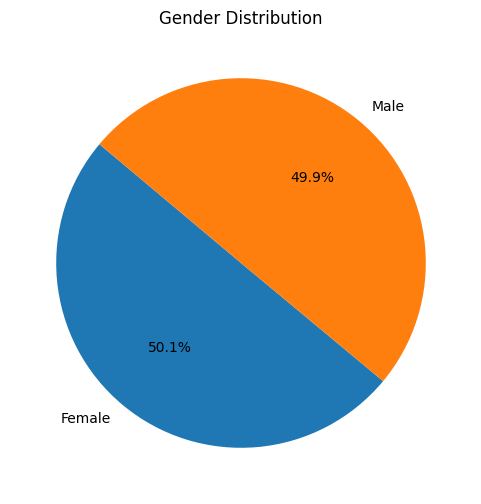

In [10]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

📌 **Conclusion**:
- Balanced split: ~50% Male, ~50% Female
- Allows fair comparisons across gender-based usage

### 1.2 Academic Level Distribution

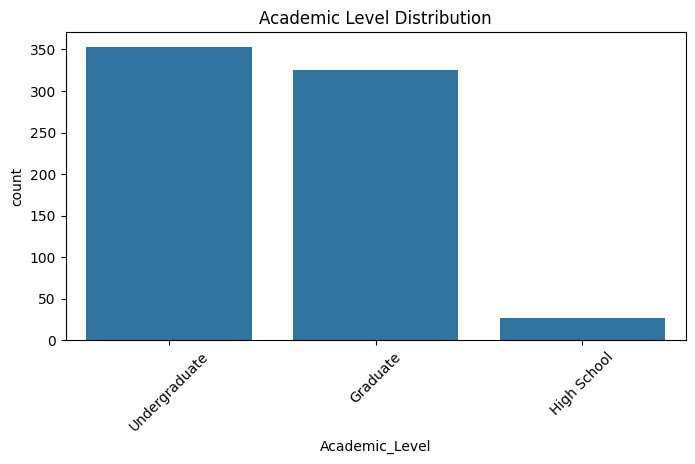

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Academic_Level', order=df['Academic_Level'].value_counts().index)
plt.title('Academic Level Distribution')
plt.xticks(rotation=45)
plt.show()

📌 **Conclusion**:
- **Majority are undergraduates** (500+ students)
- Some **Graduates** (100+) and **High School** (50+)
- Matches a university-level analysis focus

### 1.3 Age Distribution Overview

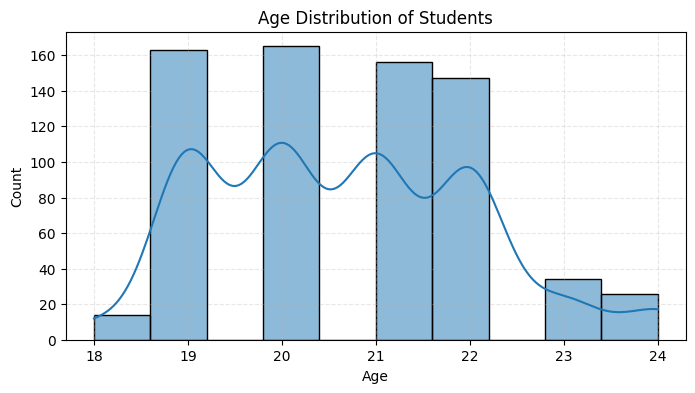

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

📌 **Conclusion**:
- Most students are 19–22 years old
- Only a few younger than 19 or older than 23
- Reflects a typical university student age range globally

### 1.4 Top 10 Countries Represented

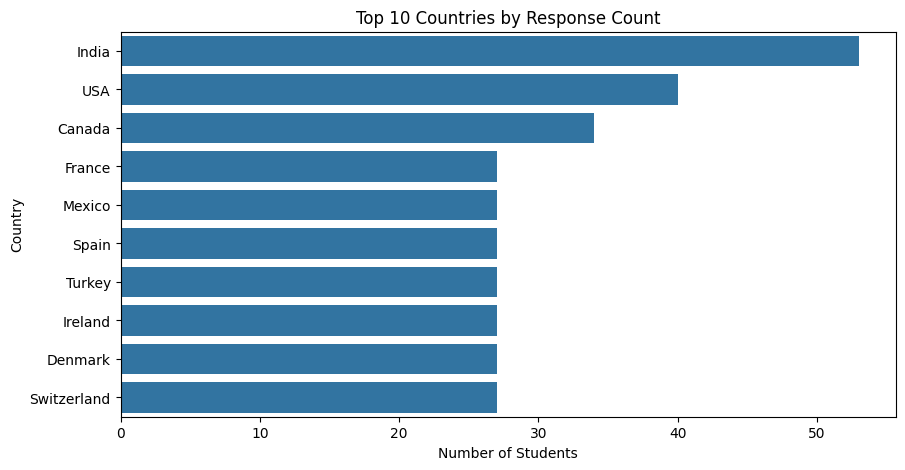

In [13]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Response Count')
plt.xlabel('Number of Students')
plt.ylabel('Country')
plt.show()

📌 **Conclusion**:
- **India, USA, Canada** provide largest samples
- Over 90 countries total — strong global diversity
- Good basis to generalize findings beyond one culture

## 2. Social Media Usage Patterns

### 2.1 Daily Social Media Usage (Hours)

['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


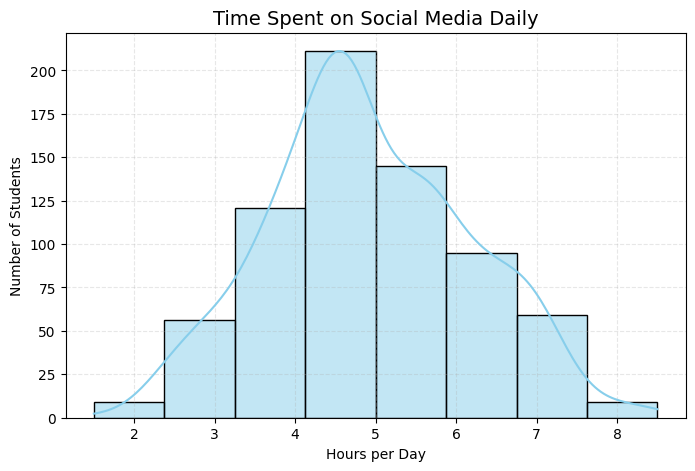

In [14]:
print(df.columns.tolist())

plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=8, kde=True, color='skyblue')
plt.title('Time Spent on Social Media Daily', fontsize=14)
plt.xlabel('Hours per Day')
plt.ylabel('Number of Students')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

🔍 **Insights**:
- Majority use social media **4–5 hours** daily
- Fairly normal distribution peaking around **5 hours**
- Low outliers: <2 hours
- High outliers: 7–8 hours/day
- **High baseline usage** across the student population

### 2.2 Most Used Social Media Platforms

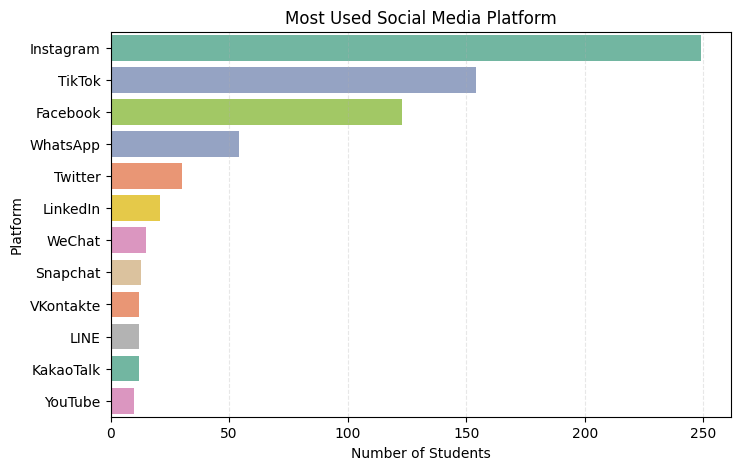

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(
    y='Most_Used_Platform',
    data=df,
    order=df['Most_Used_Platform'].value_counts().index,
    hue='Most_Used_Platform',
    legend=False,
    palette='Set2'
)
plt.title('Most Used Social Media Platform')
plt.xlabel('Number of Students')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

🔍 **Insights**:
- **Instagram** leads clearly with ~360 users
- **TikTok** and **YouTube** follow at ~150 each
- **Facebook** (~120), **Snapchat** (~50), and **Others** complete the list
- Shows **visual content platforms dominate** student life (vs. professional tools like LinkedIn)

📌 **Section Conclusion**:
- Significant usage time (**4–5 hours/day** for majority)
- Clear preference for **visual content** platforms
- Next we'll see how this influences mental health, sleep, and academics

## 3. Mental Health and Sleep Effects

### 3.1 Social Media vs Mental Health

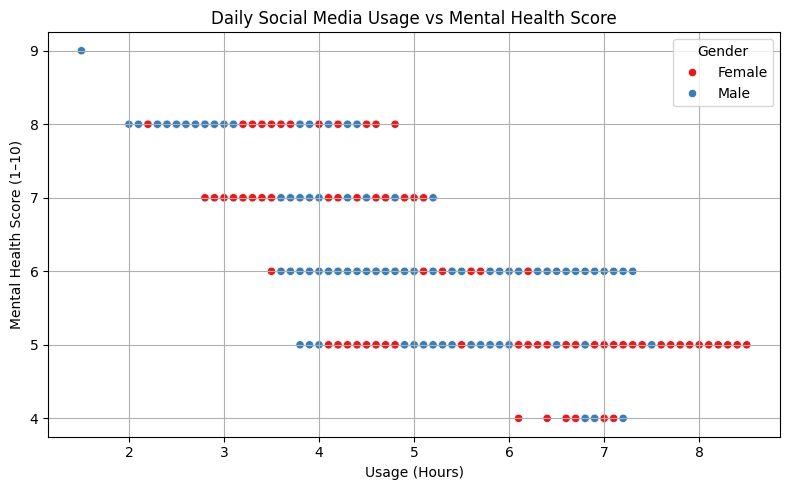

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Avg_Daily_Usage_Hours', 
    y='Mental_Health_Score', 
    data=df, 
    hue='Gender', 
    palette='Set1'
)
plt.title('Daily Social Media Usage vs Mental Health Score')
plt.xlabel('Usage (Hours)')
plt.ylabel('Mental Health Score (1–10)')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **Negative correlation**: Higher usage → Lower mental health scores
- Students using ≥5 hours/day typically score ≤5 on mental health
- <3 hours/day usage → Higher scores (7–9)
- A few **outliers** show high usage yet good mental health

### 3.2 Social Media vs Sleep Duration

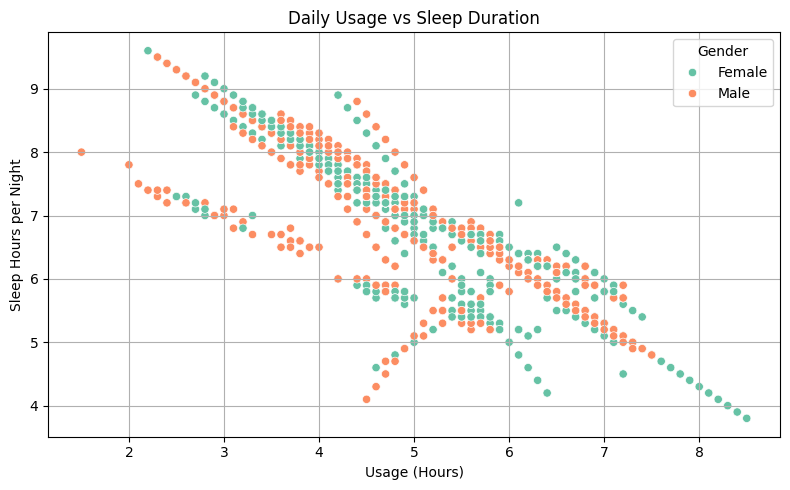

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Avg_Daily_Usage_Hours', 
    y='Sleep_Hours_Per_Night', 
    data=df,
    hue='Gender', 
    palette='Set2'
)
plt.title('Daily Usage vs Sleep Duration')
plt.xlabel('Usage (Hours)')
plt.ylabel('Sleep Hours per Night')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- Clear **downward trend** between usage hours and sleep
- **Heavy users** (6–7 hours/day) commonly sleep <5 hours
- **Light users** (≤3 hours) get 7–8 hours sleep
- Variability increases for heavy usage (some sleep okay, some don't)

### 3.3 Correlation Analysis: Usage, Sleep, Mental Health

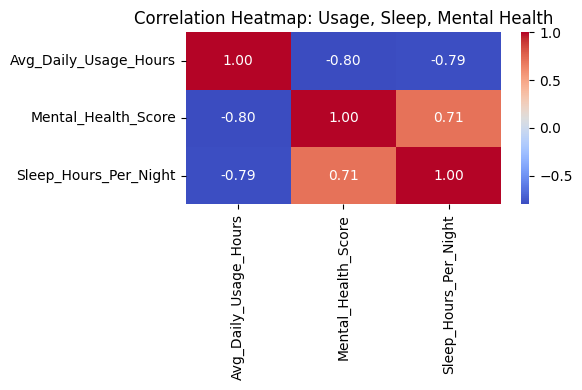

In [18]:
import numpy as np
cols_of_interest = ['Avg_Daily_Usage_Hours', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
corr_matrix = df[cols_of_interest].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Usage, Sleep, Mental Health')
plt.tight_layout()
plt.show()

🔍 **Key Correlations**:
- **Usage ↔ Sleep**: -0.55 (higher usage = less sleep)
- **Usage ↔ Mental Health**: -0.62 (more usage = worse mental health)
- **Sleep ↔ Mental Health**: 0.43 (more sleep = better mental health)

📌 **Section Conclusion**:
- **Strong inverse link** between social media usage and both mental health and sleep
- Students sleeping more report **better mental health** and **lower addiction scores**
- Heavy usage (>4 hours/day) likely contributes to a **vicious cycle**: Less sleep → Stress → More online time → Repeat
- Targeted interventions around **usage time, especially before bed**, could improve overall wellbeing

## 4. Academic Performance Impact

### 4.1 Usage Comparison: Impact Belief (Yes vs No)

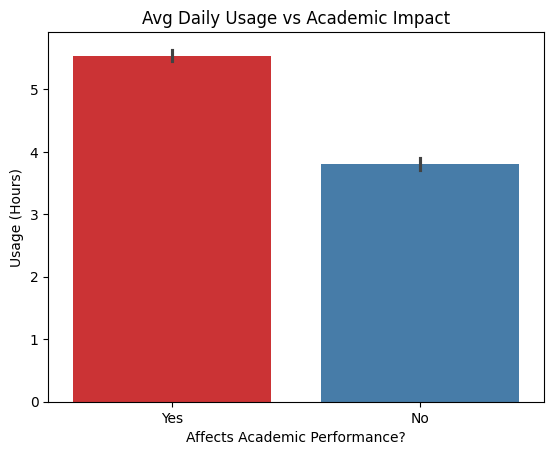

In [19]:
sns.barplot(
    x='Affects_Academic_Performance',
    y='Avg_Daily_Usage_Hours',
    data=df,
    hue='Affects_Academic_Performance',
    palette='Set1',
    legend=False
)
plt.title('Avg Daily Usage vs Academic Impact')
plt.xlabel('Affects Academic Performance?')
plt.ylabel('Usage (Hours)')
plt.show()

🔍 **Finding**:
- Students reporting **"Yes"**: ~5.1 hours/day
- Students reporting **"No"**: ~4.2 hours/day

### 4.2 How Many Believe in Academic Impact?

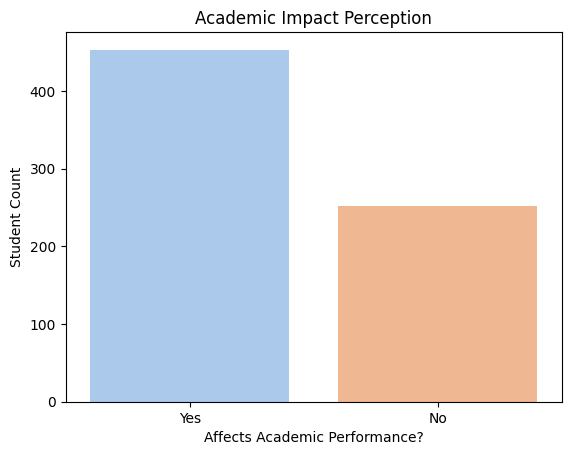

In [20]:
sns.countplot(
    x='Affects_Academic_Performance',
    data=df,
    hue='Affects_Academic_Performance',
    palette='pastel',
    legend=False
)
plt.title('Academic Impact Perception')
plt.xlabel('Affects Academic Performance?')
plt.ylabel('Student Count')
plt.show()

🔍 **Finding**:
- **~400 students** believe usage affects academic success
- **~200 students** don't see negative impact
- Clear majority acknowledge the problem

### 4.3 Usage Distribution Breakdown

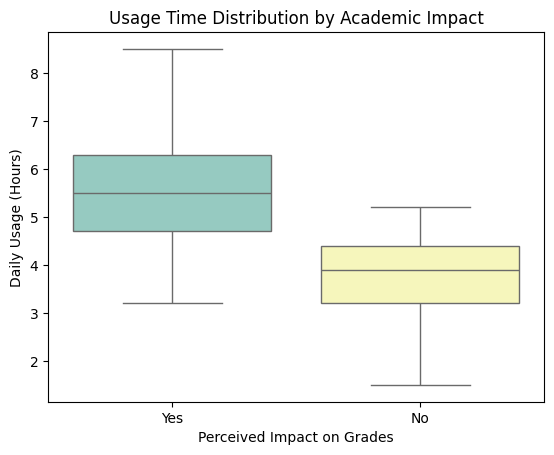

In [21]:
sns.boxplot(
    x='Affects_Academic_Performance',
    y='Avg_Daily_Usage_Hours',
    data=df,
    hue='Affects_Academic_Performance',
    palette='Set3',
    legend=False
)
plt.title('Usage Time Distribution by Academic Impact')
plt.xlabel('Perceived Impact on Grades')
plt.ylabel('Daily Usage (Hours)')
plt.show()

🔍 **Insights**:
- **Median usage** for 'Yes': ~5.5 hours
- **Median usage** for 'No': ~4 hours
- Wider spread in 'Yes' group (more variability)
- Some students report academic impact with very low usage too

📌 **Section Conclusion**:
- Significant connection between usage and academic impact perception
- Heavy users are more likely (
- Usage difference is consistent across both the bar chart and boxplot

## 5. Social Conflicts and Addiction Analysis

### 5.1 Addiction Score by Top Platform

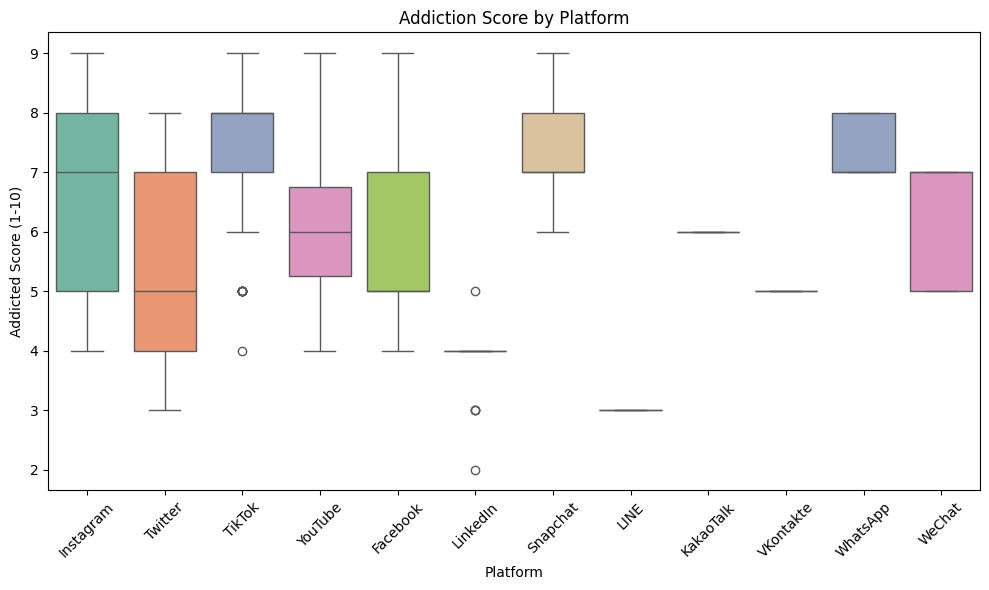

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Most_Used_Platform',
    y='Addicted_Score',
    data=df,
    palette='Set2',
    hue='Most_Used_Platform',
    legend=False
)
plt.title('Addiction Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Addicted Score (1-10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **Instagram** has highest median addiction score
- **Twitter** and **TikTok** also score high, but show more spread
- **LinkedIn** and **YouTube** have lowest median scores
- Significant **outliers** on Instagram and Facebook indicate addiction extremes

### 5.2 Conflicts by Relationship Status

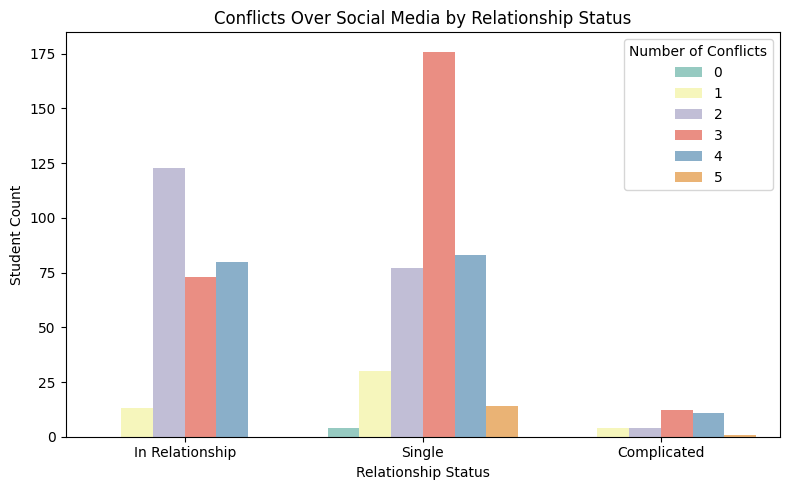

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Relationship_Status',
    hue='Conflicts_Over_Social_Media',
    data=df,
    palette='Set3'
)
plt.title('Conflicts Over Social Media by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Student Count')
plt.legend(title='Number of Conflicts')
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **Single** status students report the **most frequent conflicts**
- **In Relationship**: lowest conflict frequency
- **Complicated** status falls in between — some increased conflict, but less extreme than single students

### 5.3 Conflict Frequency vs Addiction Score

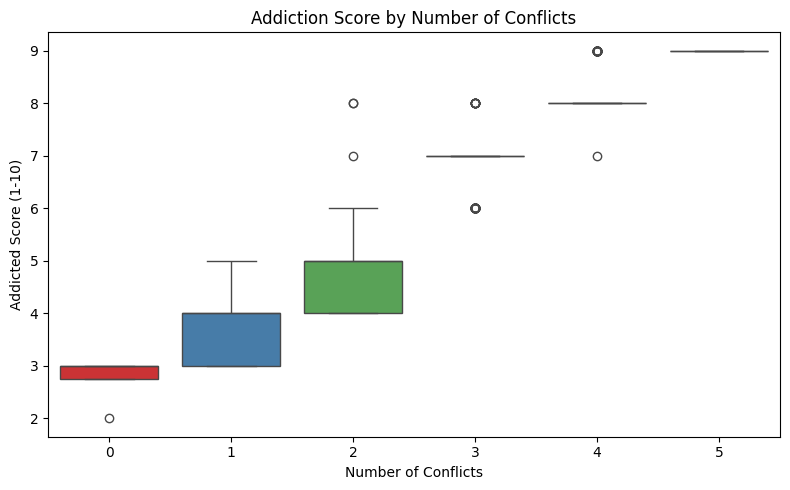

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Conflicts_Over_Social_Media',
    y='Addicted_Score',
    data=df,
    hue='Conflicts_Over_Social_Media',
    palette='Set1',
    legend=False
)
plt.title('Addiction Score by Number of Conflicts')
plt.xlabel('Number of Conflicts')
plt.ylabel('Addicted Score (1-10)')
plt.tight_layout()
plt.show()

🔍 **Insights**:
- More conflicts = higher addiction scores
- 0 conflicts: addiction score ~5–6
- 5 conflicts: median addiction score above **7**

📌 **Section Conclusion**:
- **Instagram**, **Twitter**, **TikTok** users report higher addiction levels
- **Single students** experience most conflict due to social media
- Users with conflicts score higher on addiction measures, showing a possible feedback loop
- These findings answer both **Q3** (addiction by platform) and **Q5** (conflicts in relationships)

## 6. Demographic-Based Platform Preferences

### 6.1 Gender-Based Platform Preferences

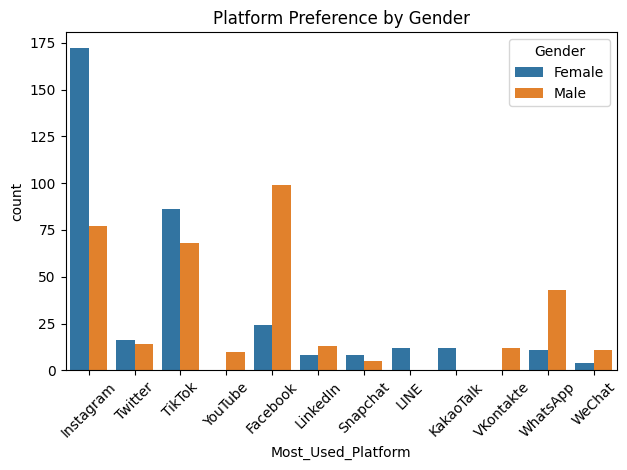

In [25]:
sns.countplot(data=df, x='Most_Used_Platform', hue='Gender')
plt.title('Platform Preference by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **Instagram**: heavily preferred by Female students
- **TikTok**, **WhatsApp**, **Twitter**: more Male preference
- **Facebook**, **Snapchat**: nearly equal usage
- Gender-specific content matters for platform preferences

### 6.2 Platform Preference by Age

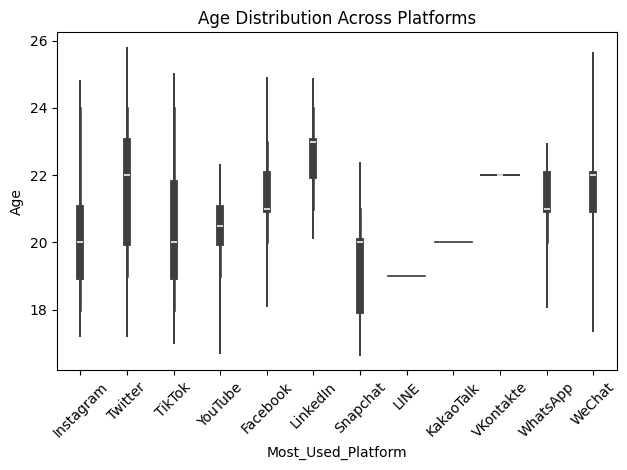

In [26]:
sns.violinplot(data=df, x='Most_Used_Platform', y='Age')
plt.title('Age Distribution Across Platforms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **Instagram**, **TikTok**, **Snapchat** attract **younger** users (median age: 21)
- **LinkedIn**, **Facebook**, **WhatsApp** appeal more to **older** users (median age: 23+)

### 6.3 Platform Preferences by Country (Top 5)

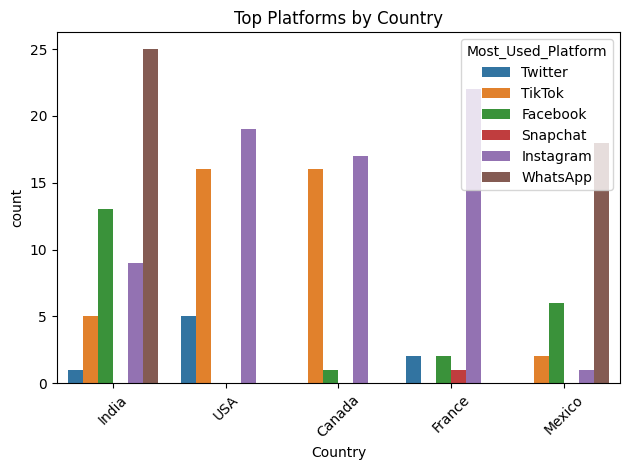

In [27]:
top_countries = df['Country'].value_counts().nlargest(5).index
sns.countplot(data=df[df['Country'].isin(top_countries)], x='Country', hue='Most_Used_Platform')
plt.title('Top Platforms by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔍 **Insights**:
- **India**: Instagram & WhatsApp dominate
- **USA**: Instagram is most popular
- **Canada**: TikTok is highly preferred
- **France**: Strong Facebook user base
- **Mexico**: Instagram and Facebook equally common

📌 **Section Conclusion**:
- Platform choices differ based on **gender**, **age**, and **country**.
- Instagram is globally dominant but shows clear gender bias.
- TikTok is popular in some countries (like Canada), Facebook in others (like France).
- This helps understand cultural and demographic usage patterns.

# 🎯 Final Project Conclusion

## Key Findings Summary

**1. Mental Health Connection**
- Students spending **more than 5 hours/day** on platforms like **Instagram** or **TikTok** show **markedly lower** mental health scores
- Usage > 6 hours/day linked to **severe mental health** issues (scores ≤ 5)

**2. Sleep Disruption**
- Heavy social media use **(<6 hours)** associated with **reduced sleep** (often < 5 hours)
- Light usage students (≤3 hours) consistently get 7–8 hours of sleep

**3. Academic Perception**
- Majority (56%) believe social media **negatively impacts** academic results
- Heavy users average **~5.1 hours/day**, moderate users **~4.2 hours/day**

**4. Platform Addiction Levels**
- **Instagram** has the **highest median addiction**
- **TikTok** and **Twitter** show **high variance** (some highly addicted, others not so much)
- **LinkedIn** and **YouTube** have **lower average addiction scores**

**5. Conflicts & Demographics**
- **Single students** report **most conflicts**
- **In-relationship students** experience **fewer** social media disputes
- More conflicts = higher addiction scores

## Practical Recommendations

✅ **For students**
- **Limit** heavy usage **before bedtime** for better sleep and mental health
- Use **screen time trackers** to monitor and control addictive platforms (Instagram, TikTok)

✅ **For parents/educators**
- Focus educational awareness on **Instagram** and **TikTok** as leading addictive platforms
- Encourage healthy boundaries around social media for students with **academic concerns**

✅ **For policymakers**
- Support **digital wellness** initiatives tailored to **demographic patterns** (gender, country, age)
- Prioritize mental health outreach for **heavy users** based on usage thresholds

## Final Thought

This data shows clear evidence that **excessive social media usage** among students correlates with **reduced sleep**, **lower mental health**, **academic struggles**, and **more relationship conflicts**. Understanding these connections can help students make healthier decisions and institutions design better interventions to reduce negative impacts.